<a id="2"></a>
<h1 style='background:#a9a799; border:0; color:black'><center>IMPORTING LIBRARIES</center></h1> 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

<a id="2"></a>
<h1 style='background:#a9a799; border:0; color:black'><center>LOADING DATA</center></h1> 


In [2]:
#read data file
ames_train= pd.read_csv("./datasets/train.csv")
ames_test= pd.read_csv("./datasets/test.csv")

In [3]:
ames_train.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,534,531363010,20,RL,80.0,9605,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,159000
1,803,906203120,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,271900
2,956,916176030,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500
3,460,528180130,120,RL,48.0,6472,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,248500
4,487,528290030,80,RL,61.0,9734,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,167000


In [4]:
ames_train.shape

(2197, 82)

<a id="3"></a>
 <h2 style='background:#a9a799; border:0; color:black'><center>DATA PREPROCESSING</center></h2> 
# Data Preprocessing
**Steps involved in Data Preprocessing**
* Data cleaning
* Dropping irrelevant coulumns
* Removing and imputing null values
* Removing outliers
* Data engineering 
* Log transforming dependent variable (SalePrice)

In [5]:
ames_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2197 entries, 0 to 2196
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2197 non-null   int64  
 1   PID              2197 non-null   int64  
 2   MS SubClass      2197 non-null   int64  
 3   MS Zoning        2197 non-null   object 
 4   Lot Frontage     1835 non-null   float64
 5   Lot Area         2197 non-null   int64  
 6   Street           2197 non-null   object 
 7   Alley            143 non-null    object 
 8   Lot Shape        2197 non-null   object 
 9   Land Contour     2197 non-null   object 
 10  Utilities        2197 non-null   object 
 11  Lot Config       2197 non-null   object 
 12  Land Slope       2197 non-null   object 
 13  Neighborhood     2197 non-null   object 
 14  Condition 1      2197 non-null   object 
 15  Condition 2      2197 non-null   object 
 16  Bldg Type        2197 non-null   object 
 17  House Style   

In [6]:
ames_train.dtypes
ames_train.dtypes.value_counts()

object     43
int64      28
float64    11
dtype: int64

In [7]:
#change data type of Order from int64 to object
ames_train['Order'] = ames_train['Order'].astype('object')

Text(0, 0.5, 'Feature Names')

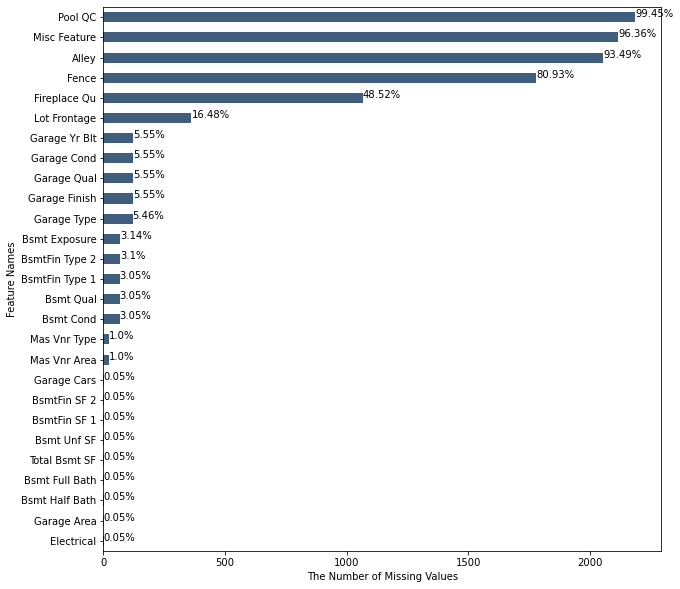

In [8]:
#Checking percentage of null values

Nan = ames_train.isnull().sum()[ames_train.isnull().sum()>0]

Nan.sort_values().plot(kind='barh', figsize=(10, 10), color = "#3F5D7D");

for y, x in enumerate(Nan.sort_values()):
    
    plt.annotate(str(round(x/ames_train.shape[0]*100,2))+'%', xy=(x, y), size=10)
    
plt.xlabel('The Number of Missing Values')

plt.ylabel('Feature Names')

In [9]:
# Drop PID as irrelevant coulums
# Drop  'Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu' which have too many null values 
ames_train.drop(['PID', 'Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'], axis=1, inplace=True)
ames_train.head()

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,534,20,RL,80.0,9605,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2009,WD,Normal,159000
1,803,20,RL,90.0,14684,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,6,2009,WD,Normal,271900
2,956,20,RL,NaN,14375,Pave,IR1,Lvl,NoSeWa,CulDSac,...,0,0,233,0,0,1,2009,COD,Abnorml,137500
3,460,120,RL,48.0,6472,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2009,WD,Normal,248500
4,487,80,RL,61.0,9734,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2009,WD,Normal,167000


In [10]:
ames_train['Lot Frontage'].describe()

count    1835.000000
mean       69.549319
std        23.188224
min        21.000000
25%        58.500000
50%        69.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64

C:\Users\science01\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


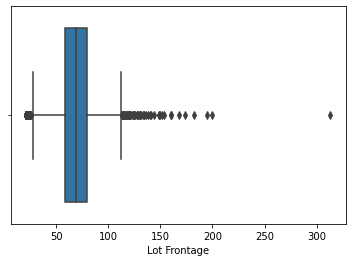

C:\Users\science01\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


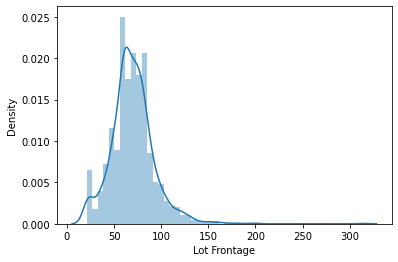

In [11]:
# Box plot
#
sns.boxplot(ames_train['Lot Frontage'])
plt.show()
#
# Distribution plot
#
sns.distplot(ames_train['Lot Frontage'])
plt.show()

In [12]:
#Lot Frontage is right skewed with outliers
#Imputing missing values of Lot Frontage with it's mode then dropping the outliers 
ames_train['Lot Frontage'].fillna(ames_train['Lot Frontage'].mode()[0], inplace=True)
ames_train = ames_train[(ames_train['Lot Frontage'] < 250)]

In [13]:
ames_train.shape

(2196, 76)

In [14]:
ames_train['Garage Yr Blt'].value_counts()

2005.0    116
2007.0     95
2006.0     88
2004.0     78
2003.0     75
         ... 
1895.0      1
1906.0      1
1896.0      1
1929.0      1
2207.0      1
Name: Garage Yr Blt, Length: 101, dtype: int64

In [15]:
#Year 2207 is incorrect input, drop this row
ames_train= ames_train[ames_train['Garage Yr Blt'] != 2207]

C:\Users\science01\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


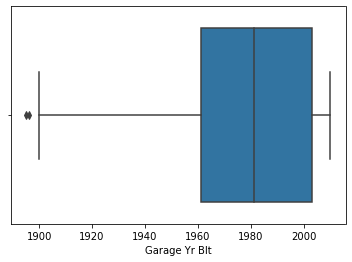

C:\Users\science01\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


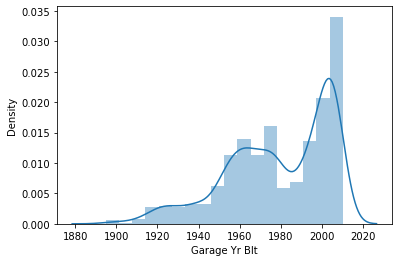

In [16]:
# Box plot
#
sns.boxplot(ames_train['Garage Yr Blt'])
plt.show()
#
# Distribution plot
#
sns.distplot(ames_train['Garage Yr Blt'])
plt.show()

In [17]:
ames_train['Garage Yr Blt'].describe()

count    2073.000000
mean     1978.766040
std        25.265707
min      1895.000000
25%      1961.000000
50%      1981.000000
75%      2003.000000
max      2010.000000
Name: Garage Yr Blt, dtype: float64

In [18]:
ames_train['Garage Cond'].value_counts()

TA    1991
Fa      55
Po      13
Gd      11
Ex       3
Name: Garage Cond, dtype: int64

In [19]:
ames_train['Garage Qual'].value_counts()

TA    1955
Fa      93
Gd      18
Po       5
Ex       2
Name: Garage Qual, dtype: int64

In [20]:
ames_train['Garage Type'].value_counts()

Attchd     1316
Detchd      568
BuiltIn     137
Basment      28
2Types       17
CarPort       9
Name: Garage Type, dtype: int64

In [21]:
ames_train['Garage Finish'].value_counts()

Unf    902
RFn    628
Fin    543
Name: Garage Finish, dtype: int64

In [22]:
#Impute missing values of Garage Cond, Garage Qual, Garage Type with their modes. 
ames_train['Garage Cond'].fillna(ames_train['Garage Cond'].mode()[0], inplace=True)
ames_train['Garage Qual'].fillna(ames_train['Garage Qual'].mode()[0], inplace=True)
ames_train['Garage Type'].fillna(ames_train['Garage Type'].mode()[0], inplace=True)
ames_train['Garage Finish'].fillna(ames_train['Garage Finish'].mode()[0], inplace=True)

In [23]:
#Assuming garage is bulilt as the same time as house, thus fill the 'Garage Yr Blt' null values with the same value as 'Year Built' of the house
ames_train['Garage Yr Blt'] = ames_train.apply(lambda row: row['Year Built'] 
                                     if np.isnan(row['Garage Yr Blt']) else row['Garage Yr Blt'],axis =1)

In [24]:
ames_train['Bsmt Exposure'].value_counts()

No    1406
Av     324
Gd     226
Mn     170
Name: Bsmt Exposure, dtype: int64

In [25]:
ames_train['BsmtFin Type 1'].value_counts()

GLQ    662
Unf    644
ALQ    332
Rec    204
BLQ    179
LwQ    107
Name: BsmtFin Type 1, dtype: int64

In [26]:
ames_train['BsmtFin Type 2'].value_counts()

Unf    1869
Rec      76
LwQ      69
BLQ      52
ALQ      38
GLQ      23
Name: BsmtFin Type 2, dtype: int64

In [27]:
ames_train['Bsmt Qual'].value_counts()

Gd    929
TA    929
Ex    197
Fa     71
Po      2
Name: Bsmt Qual, dtype: int64

In [28]:
ames_train['Bsmt Cond'].value_counts()

TA    1968
Gd      83
Fa      72
Po       3
Ex       2
Name: Bsmt Cond, dtype: int64

In [29]:
#Impute missing values of 'Bsmt Cond', 'Bsmt Exposure', ''BsmtFin Type 2' with their modes. 

ames_train['Bsmt Cond'].fillna(ames_train['Bsmt Cond'].mode()[0], inplace=True)
ames_train['Bsmt Exposure'].fillna(ames_train['Bsmt Exposure'].mode()[0], inplace=True)
ames_train['BsmtFin Type 2'].fillna(ames_train['BsmtFin Type 2'].mode()[0], inplace=True)
ames_train['BsmtFin Type 1'].fillna(ames_train['BsmtFin Type 1'].mode()[0], inplace=True)
ames_train['Bsmt Qual'].fillna(ames_train['Bsmt Qual'].mode()[0], inplace=True)

In [30]:
ames_train['Mas Vnr Type'].value_counts()

None       1307
BrkFace     658
Stone       189
BrkCmn       19
CBlock        1
Name: Mas Vnr Type, dtype: int64

In [31]:
ames_train['Mas Vnr Area'].value_counts()

0.0      1303
120.0      12
340.0      10
16.0        9
216.0       9
         ... 
27.0        1
175.0       1
66.0        1
39.0        1
406.0       1
Name: Mas Vnr Area, Length: 390, dtype: int64

In [32]:
#Impute missing values of 'Mas Vnr Type', 'Mas Vnr Area' with their modes. 

ames_train['Mas Vnr Type'].fillna(ames_train['Mas Vnr Type'].mode()[0], inplace=True)
ames_train['Mas Vnr Area'].fillna(ames_train['Mas Vnr Area'].mode()[0], inplace=True)

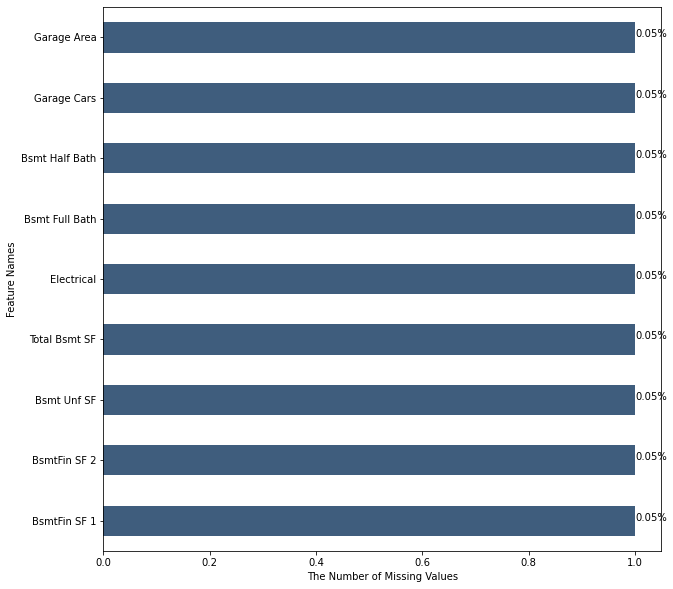

In [33]:
#Rechecking percentage of null values

Nan = ames_train.isnull().sum()[ames_train.isnull().sum()>0]

Nan.sort_values().plot(kind='barh', figsize=(10, 10), color = "#3F5D7D");

for y, x in enumerate(Nan.sort_values()):
    
    plt.annotate(str(round(x/ames_train.shape[0]*100,2))+'%', xy=(x, y), size=10)
    
plt.xlabel('The Number of Missing Values')

plt.ylabel('Feature Names')
plt.show()

In [34]:
#Impute all remaining missing values with their modes. 
ames_train.fillna(ames_train.mode(), inplace =True)
ames_train.isnull().sum()

Order             0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [35]:
#Drop all null values #lossing 2 data
ames_train.shape

(2195, 76)

Changing year which categorical data to duration of time which is integer variable

In [36]:
#Changing year to duration of time of train data
ames_train['Year Built_duration'] = ames_train['Year Built'] -ames_train['Year Built'].min()+1
ames_train['Year Remod/Add_duration'] = ames_train['Year Remod/Add'] -ames_train['Year Remod/Add'].min()+1
ames_train['Year Sold_duration'] = ames_train['Yr Sold'] -ames_train['Yr Sold'].min()+1
ames_train['Garage Yr Blt_duration'] = ames_train['Garage Yr Blt'] - ames_train['Garage Yr Blt'].min() +1

#Drop original columns
ames_train.drop(['Year Built', 'Year Remod/Add', 'Yr Sold', 'Garage Yr Blt'], axis=1, inplace=True)
ames_train.head()

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Misc Val,Mo Sold,Sale Type,Sale Condition,SalePrice,Year Built_duration,Year Remod/Add_duration,Year Sold_duration,Garage Yr Blt_duration
0,534,20,RL,80.0,9605,Pave,Reg,Lvl,AllPub,Corner,...,0,0,4,WD,Normal,159000,136,58,4,136.0
1,803,20,RL,90.0,14684,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,6,WD,Normal,271900,119,42,4,119.0
2,956,20,RL,60.0,14375,Pave,IR1,Lvl,NoSeWa,CulDSac,...,0,0,1,COD,Abnorml,137500,87,9,4,87.0
3,460,120,RL,48.0,6472,Pave,Reg,Lvl,AllPub,Inside,...,0,0,4,WD,Normal,248500,137,59,4,137.0
4,487,80,RL,61.0,9734,Pave,IR1,Lvl,AllPub,Inside,...,0,0,5,WD,Normal,167000,133,55,4,133.0


In [37]:
#Changing year to duration of time of train data
ames_test['Year Built_duration'] = ames_test['Year Built'] -ames_test['Year Built'].min()+1
ames_test['Year Remod/Add_duration'] = ames_test['Year Remod/Add'] -ames_test['Year Remod/Add'].min()+1
ames_test['Year Sold_duration'] = ames_test['Yr Sold'] -ames_test['Yr Sold'].min()+1
ames_test['Garage Yr Blt_duration'] = ames_test['Garage Yr Blt'] - ames_test['Garage Yr Blt'].min() +1

#Drop original columns
ames_test.drop(['Year Built', 'Year Remod/Add', 'Yr Sold', 'Garage Yr Blt'], axis=1, inplace=True)
ames_test.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Fence,Misc Feature,Misc Val,Mo Sold,Sale Type,Sale Condition,Year Built_duration,Year Remod/Add_duration,Year Sold_duration,Garage Yr Blt_duration
0,2127,907135180,20,RL,60.0,8070,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,8,WD,Normal,115,46,2,NaN
1,193,903206120,75,RL,NaN,7793,Pave,NaN,IR1,Bnk,...,NaN,NaN,0,5,WD,Normal,43,56,5,19.0
2,2407,528181040,120,RL,40.0,6792,Pave,NaN,IR1,Lvl,...,NaN,NaN,0,3,New,Partial,126,57,1,96.0
3,46,528175010,120,RL,44.0,6371,Pave,NaN,IR1,Lvl,...,NaN,NaN,0,6,New,Partial,130,61,5,101.0
4,2478,531379030,60,RL,70.0,8304,Pave,NaN,IR1,Lvl,...,GdPrv,NaN,0,7,WD,Normal,118,49,1,88.0


In [56]:
ames_test['Year Built_duration'].describe()

count    733.000000
mean      90.334243
std       29.551592
min        1.000000
25%       71.000000
50%       91.000000
75%      119.000000
max      131.000000
Name: Year Built_duration, dtype: float64

In [58]:
ames_test['Year Remod/Add_duration'].describe()

count    733.000000
mean      33.724420
std       20.683681
min        1.000000
25%       16.000000
50%       41.000000
75%       53.000000
max       61.000000
Name: Year Remod/Add_duration, dtype: float64

In [59]:
ames_test['Year Sold_duration'].describe()

count    733.000000
mean       2.780355
std        1.324237
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Year Sold_duration, dtype: float64

In [61]:
ames_test['Garage Yr Blt_duration'].describe()

count    696.000000
mean      66.873563
std       24.725220
min        1.000000
25%       49.000000
50%       68.000000
75%       90.000000
max      101.000000
Name: Garage Yr Blt_duration, dtype: float64

In [38]:
# Get list of float and integer variables
nvar = (ames_train.dtypes !="object")
numer_cols = list(nvar[nvar].index)
print("numerical variables:")
print(numer_cols)

numerical variables:
['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'SalePrice', 'Year Built_duration', 'Year Remod/Add_duration', 'Year Sold_duration', 'Garage Yr Blt_duration']


Log Transforming dependent variable (SalePrice)

C:\Users\science01\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


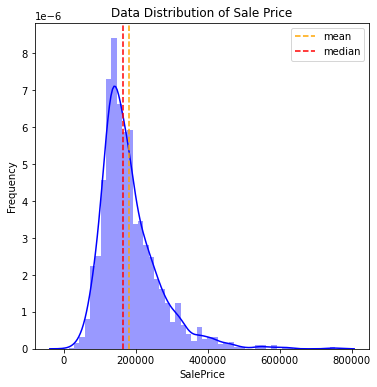

In [39]:
#checking Data Distribution of SalePrice
plt.figure(figsize=(6,6))

sns.distplot(ames_train['SalePrice'], color='b')

plt.ylabel('Frequency')

plt.title('Data Distribution of Sale Price')

plt.axvline(ames_train['SalePrice'].mean(), linestyle = '--', color = 'orange', label ='mean')

plt.axvline(ames_train['SalePrice'].median(), linestyle = '--', color = 'r', label ='median')

plt.legend()

In [40]:
# Sale price is right skewed with long right tailed
ames_train['SalePrice'].skew().round(2)

1.78

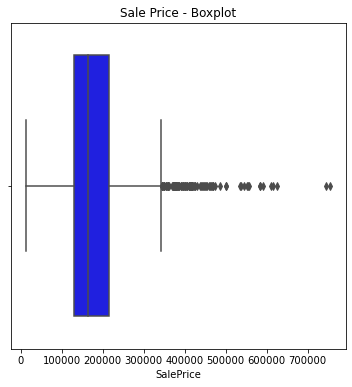

In [41]:
#checking outliers
plt.figure(figsize=(6,6))
plt.title('Sale Price - Boxplot')
sns.boxplot(x=ames_train['SalePrice'], color='b');


In [42]:
# Log transform Sale price to treat outliers and convert right skewed data ton normal distribution form
ames_train['SalePrice_log'] = np.log2(ames_train['SalePrice'])

C:\Users\science01\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


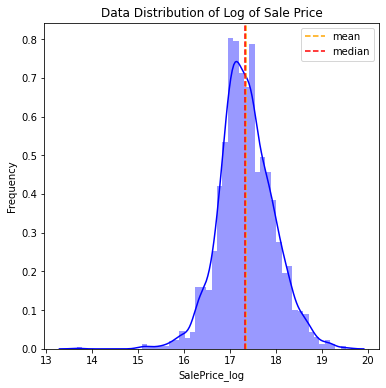

In [43]:
#checking Data Distribution of Log(SalePrice)
plt.figure(figsize=(6,6))

sns.distplot(ames_train['SalePrice_log'], color='b')

plt.ylabel('Frequency')

plt.title('Data Distribution of Log of Sale Price')

plt.axvline(ames_train['SalePrice_log'].mean(), linestyle = '--', color = 'orange', label ='mean')

plt.axvline(ames_train['SalePrice_log'].median(), linestyle = '--', color = 'r', label ='median')

plt.legend()

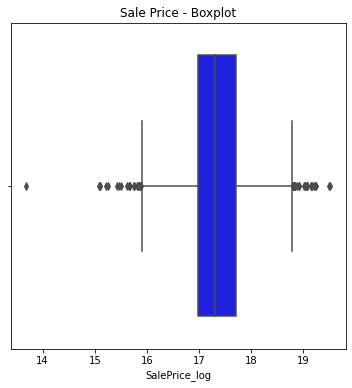

In [44]:
#checking outliers of Log of Sale Price
plt.figure(figsize=(6,6))
plt.title('Sale Price - Boxplot')
sns.boxplot(x=ames_train['SalePrice_log'], color='b');

In [45]:
#Dropping the outliers. 
ames_train = ames_train[(ames_train['SalePrice_log'] > 14)]
ames_train.shape

(2194, 77)

Exploring potential independent variables with predictive power of sale price

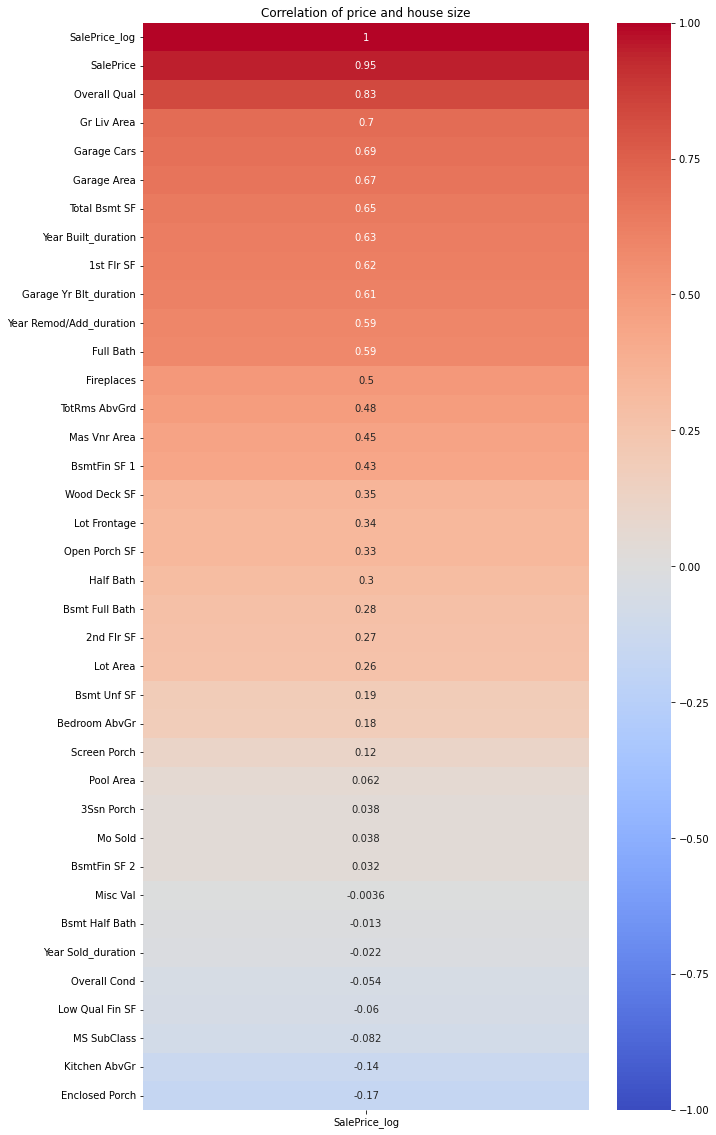

In [46]:
plt.figure(figsize = (10,20))
sns.heatmap(ames_train.corr()[['SalePrice_log']].sort_values(by = 'SalePrice_log', ascending = False), 
                cmap = 'coolwarm',
                vmax = 1,
                vmin = -1,
                annot = True)
plt.title('Correlation of price and house size')

plt.yticks(rotation =0)
plt.show()

In [47]:
#14 variables which have correlation coefficient 0.4 and above will be explore collinearity later, orther varibable are dropped \
ames_train.drop( ['MS SubClass', 'Lot Frontage', 'Lot Area', 
             'Overall Cond', 'BsmtFin SF 2', 
             'Bsmt Unf SF', '2nd Flr SF', 'Low Qual Fin SF', 
             'Bsmt Full Bath', 'Bsmt Half Bath', 'Half Bath', 
             'Bedroom AbvGr', 'Kitchen AbvGr',
             'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 
             'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 
             'Year Sold_duration'], axis=1, inplace=True)

<AxesSubplot:>

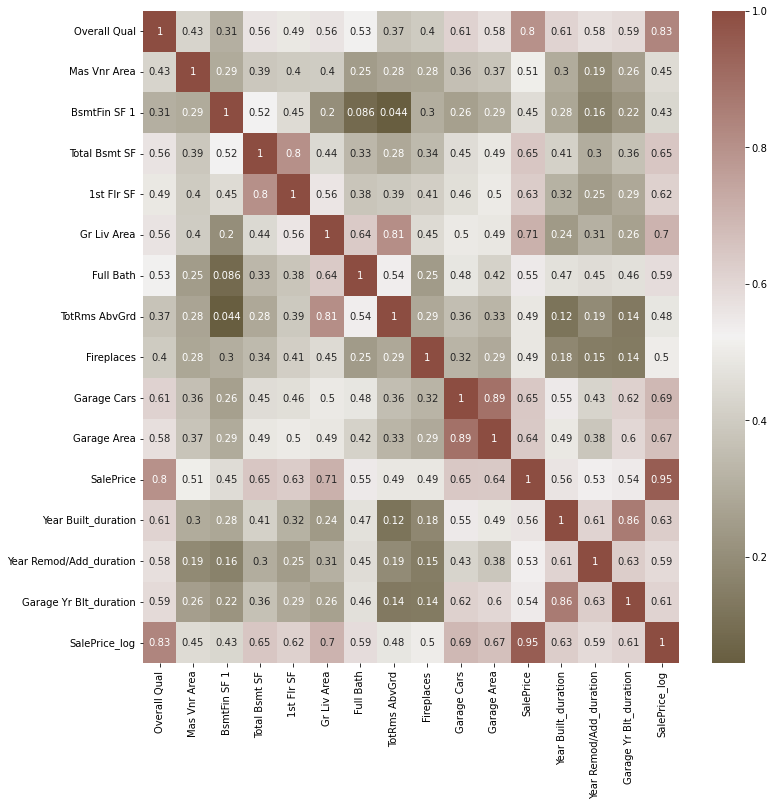

In [48]:
#Checking collinearity using correlation matrix
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= ames_train.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

Variables which could potetially cause colinearity issues leading overfitting model are
'1st Flr SF'  : 'Total Bsmt SF'  ==> dropping '1st Flr SF' 
'Gr Liv Area' : 'TotRms AbvGrd' ==> dropping 'TotRms AbvGrd'
'Garage Cars' : 'Garage Area' ==> dropping 'Garage Cars' 
'Year Built_duration' : 'Garage Yr Blt_duration' ==> dropping 'Garage Yr Blt_duration'


In [50]:
# Drop variables which could potetially cause colinearity issues leading overfitting model 
ames_train.drop( ['1st Flr SF', 'TotRms AbvGrd', 'Garage Cars' , 'Garage Yr Blt_duration' ], axis=1, inplace=True)

#### Exploring categorical variables

In [52]:
# Creating a function to plot boxplot

def subplot_boxplot(dataframe, list_of_columns):
    
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,5*nrows)) 
    
    ax = ax.ravel() 
    
    if len(list_of_columns) %2 !=0:
        
        ax[len(list_of_columns)].set_visible(False)
        
    for i, column in enumerate(list_of_columns):
        
        names = ames_train.groupby(column).mean()['SalePrice_log'].sort_values().index
        
        sns.boxplot(dataframe[column],dataframe['SalePrice_log'],order = names, ax = ax[i], color="#99d6ff") 
        
        ax[i].set_title(f' " Log SalePrice" vs "{column}"', fontsize =18)
        
        ax[i].set_ylabel('Values',fontsize=15)
        
        ax[i].set_xlabel(column,fontsize=15) 
        
        ax[i].set_xticklabels(names,rotation=40) 
        
    plt.tight_layout()

C:\Users\science01\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\science01\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\science01\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\s

C:\Users\science01\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\science01\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\science01\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\s

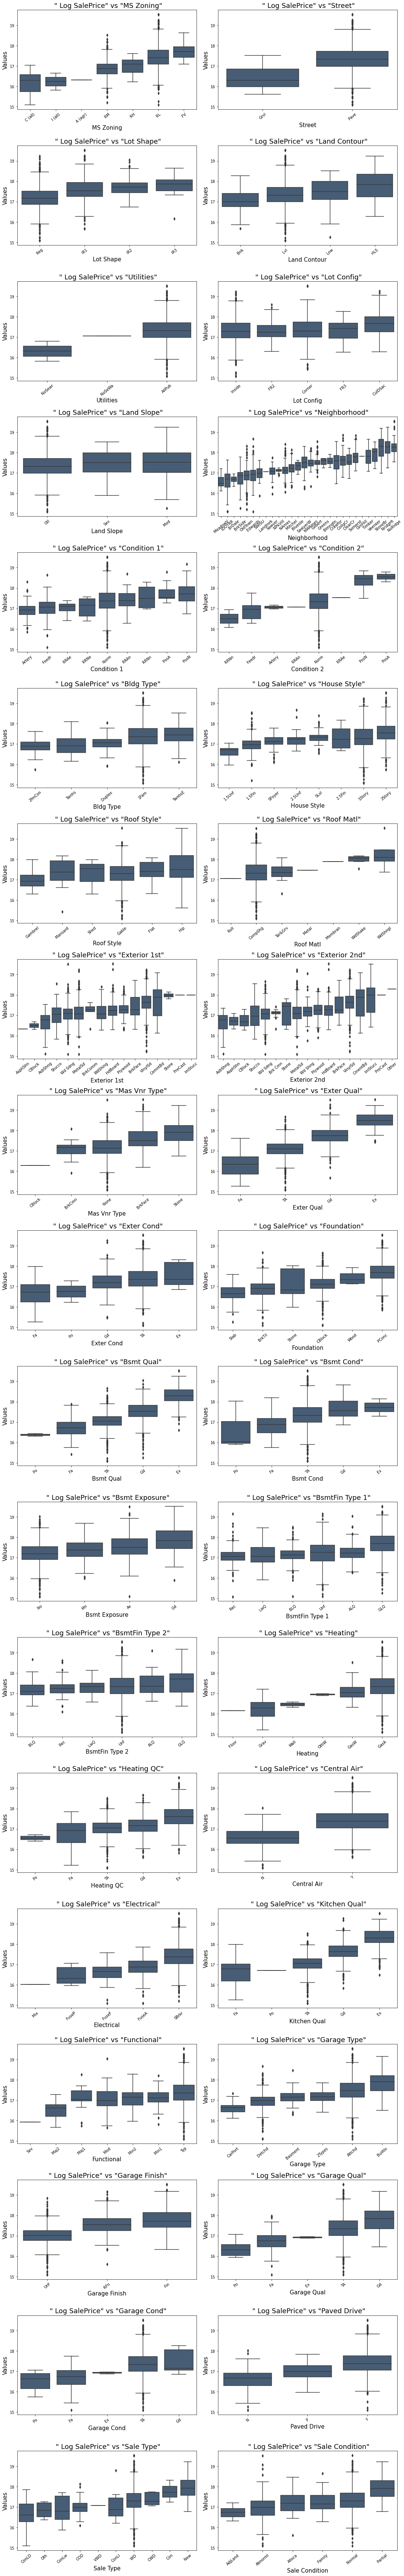

In [55]:
Catogories_columns = ames_train.select_dtypes(include = 'object').columns
Catogories_columns = Catogories_columns[Catogories_columns != 'Order']
subplot_boxplot(ames_train, Catogories_columns)

In [ ]:
Lot Config
Land Slope 
Condition 1 
Bldg Type 
House style 
Roof style  
BsmtFin Type 1 
BsmtFin Type 2


In [ ]:
MS Zoning
Street

In [ ]:
#Assemble our X and y variables
X=ames[['overall_qual']]
y = ames['saleprice']
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 

#Instantiate the model/Fit Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Train Score
model.score(X_train, y_train)
print(f'Train R-squared Score: {model.score(X_train, y_train)}')

In [ ]:
# Test Score
model.score(X_test, y_test)
print(f'Test R-squared Score: {model.score(X_test, y_test)}')

In [ ]:
# Cross Val Score
cross_val_score(model, X_train, y_train, cv =5)

In [ ]:
#evaluate models with matrics
print(f'R^2 is : {model.score(X_train,y_train)}' )
print(f'MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

In [ ]:
model.fit(X, y)
#evaluate models with matrics
print(f'R^2 is : {model.score(X,y)}' )

In [ ]:
#make prediction
y_preds = model.predict(X_test)

In [ ]:
mean_squared_error(y, preds, squared=False)

In [ ]:
test = pd.read_csv("./datasets/test.csv")
test_order = test.Order
test = test[['Overall Qual']]
test.columns

In [ ]:
preds_test = model.predict(test)
preds_test[:10]

In [ ]:
## create dataframe with "Order" and prediction
pred_df = pd.DataFrame({'Order':test_order, 'SalePrice':preds_test})
pred_df

In [ ]:
## save to csv file for submission
## index = False
pred_df.to_csv('submission.csv', index=False)